In [1]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston

In [2]:
X = load_boston()
X['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
X1 = load_boston()['data'][:,[8,10]] # 2 clusters
X2 = load_boston()['data'][:,[5,12]] # 'banana' shaped

In [4]:
classifiers = {
    'Empirical Covariance': EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    'Robust Covariance (Minimum Covariance Determinant)': EllipticEnvelope(contamination=0.261),
    'OCSVM': OneClassSVM(nu=0.261,gamma=0.05)
}  # contamination is the proportion of outliers
colors = ['m','g','b']
legend1={}
legend2={}

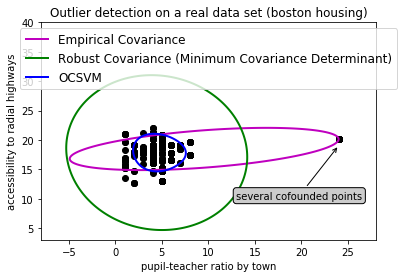

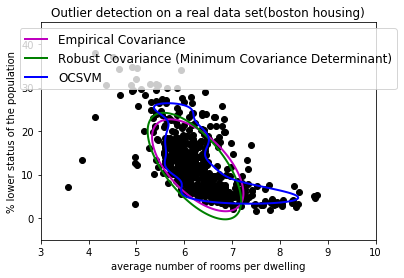

In [5]:
x1,y1 = np.meshgrid(np.linspace(-8,28,500),np.linspace(3,40,500))
x2,y2 = np.meshgrid(np.linspace(3,10,500),np.linspace(-5,45,500))
for i,(clf_name,clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[x1.ravel(),y1.ravel()]) #decision_function计算样本点到分割超平面的函数距离。
    Z1 = Z1.reshape(x1.shape)
    legend1[clf_name] = plt.contour(
        x1,y1,Z1,levels=[0],linewidths=2,colors=colors[i])
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[x2.ravel(),y2.ravel()])
    Z2 = Z2.reshape(x2.shape)
    legend2[clf_name] = plt.contour(
        x2,y2,Z2,levels=[0],linewidths=2,colors=colors[i])
legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

plt.figure(1)
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X1[:,0],X1[:,1],color='black')
bbox_args = dict(boxstyle='round',fc='0.8')
arrow_args = dict(arrowstyle='->')
plt.annotate("several cofounded points",xy=(24,19),
            xycoords='data',textcoords='data',
            xytext=(13,10),bbox=bbox_args,arrowprops=arrow_args)
plt.xlim((x1.min(),x1.max()))
plt.ylim(((y1.min(),y1.max())))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
(legend1_keys_list[0],legend1_keys_list[1],legend1_keys_list[2]),
loc='upper center',prop=matplotlib.font_manager.FontProperties(size=12))

plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)
plt.title("Outlier detection on a real data set(boston housing)")
plt.scatter(X2[:,0], X2[:,1], color='black')
plt.xlim((x2.min(),x2.max()))
plt.ylim((y2.min(),y2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
(legend2_keys_list[0],legend2_keys_list[1],legend2_keys_list[2]),
loc='upper center',prop=matplotlib.font_manager.FontProperties(size=12))

plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")

plt.show()